In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_flat, y_train)

y_pred = neigh.predict(X_test_flat)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)



Accuracy: 0.9705


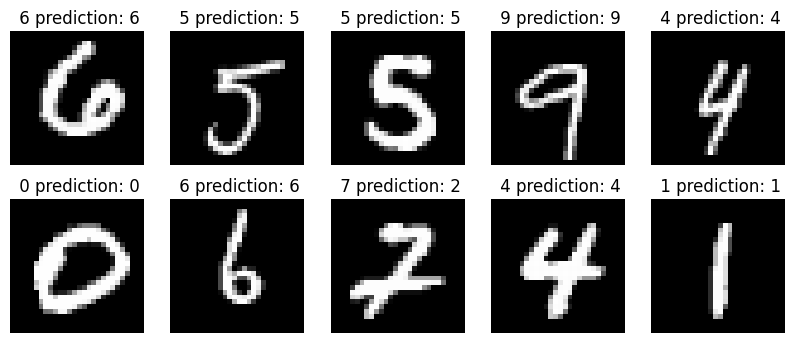

In [4]:
plt.figure(figsize=(10, 4))
for i in range(10):
    idx = np.random.randint(0, len(X_test))  
    plt.subplot(2, 5, i+1)                    
    plt.imshow(X_test[idx], cmap="gray")     
    plt.title(f" {y_test[idx]} prediction: {y_pred[idx]}")
    plt.axis("off")
plt.show()

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



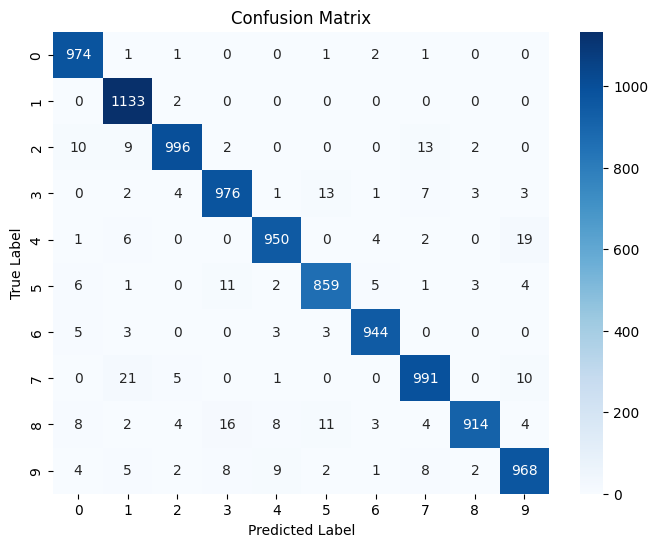

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),  
            yticklabels=range(10))  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()